In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This will likely need to change everytime if your path looks different to mine... thats annoying

In [2]:
PATH_TO_PROJECT = '/content/drive/Othercomputers/My Laptop/FAERS-analytics'

In [3]:
%cd $PATH_TO_PROJECT

/content/drive/Othercomputers/My Laptop/FAERS-analytics


In [4]:
!ls

 data	        DEMO23Q4.txt		 INDI23Q3.txt	   OUTC23Q4.txt   RPSR23Q3.txt
 dataa.py       DRUG23Q3.txt		 INDI23Q4.txt	   REAC23Q3.txt   RPSR23Q4.txt
 data-out       DRUG23Q4.txt		 merged_data.csv   REAC23Q4.txt   THER23Q3.txt
 DEMO23Q3.txt  'FAERS analytics.ipynb'	 OUTC23Q3.txt	   README.md	  THER23Q4.txt


In [5]:
import os

output_path_dir = 'data-out/'
input_path_dir = 'data/'

if not os.path.isdir(output_path_dir):
  !mkdir $output_path_dir

for file in os.listdir(input_path_dir):
  if file.endswith(".zip"):
    input_path_file = input_path_dir + file
    output_path_file = output_path_dir + file.split('.zip')[0]
    if not os.path.isdir(output_path_file):
      !mkdir $output_path_file
      !unzip $input_path_file -d $output_path_file

In [6]:
!ls $output_path_dir

FAERS_ASCII_2023_Q3  FAERS_ASCII_2023_Q4


In [7]:
q3_dir = output_path_dir + 'FAERS_ASCII_2023_Q3/ASCII/'
!ls $q3_dir

ASC_NTS.pdf   DRUG23Q3.pdf  INDI23Q3.txt  REAC23Q3.pdf	RPSR23Q3.txt
DEMO23Q3.pdf  DRUG23Q3.txt  OUTC23Q3.pdf  REAC23Q3.txt	THER23Q3.pdf
DEMO23Q3.txt  INDI23Q3.pdf  OUTC23Q3.txt  RPSR23Q3.pdf	THER23Q3.txt


In [8]:
q4_dir = output_path_dir + 'FAERS_ASCII_2023_Q4/ASCII/'
!ls $q4_dir

ASC_NTS.pdf   DRUG23Q4.pdf  INDI23Q4.txt  REAC23Q4.pdf	RPSR23Q4.txt
DEMO23Q4.pdf  DRUG23Q4.txt  OUTC23Q4.pdf  REAC23Q4.txt	THER23Q4.pdf
DEMO23Q4.txt  INDI23Q4.pdf  OUTC23Q4.txt  RPSR23Q4.pdf	THER23Q4.txt


In [9]:
import pandas as pd

data = {}
directories = [q3_dir, q4_dir]


for directory in directories:
  for file in os.listdir(directory):
    if file.endswith(".txt"):
      input_path_file = './' + directory + file
      output_data_frame_name = file.split('.txt')[0]
      output_data_frame = pd.read_csv(input_path_file, sep='$')
      data[output_data_frame_name] = output_data_frame

data.keys()


<ipython-input-9-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')
<ipython-input-9-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')


dict_keys(['THER23Q3', 'DRUG23Q3', 'RPSR23Q3', 'REAC23Q3', 'INDI23Q3', 'OUTC23Q3', 'DEMO23Q3', 'THER23Q4', 'RPSR23Q4', 'DRUG23Q4', 'REAC23Q4', 'OUTC23Q4', 'INDI23Q4', 'DEMO23Q4'])

In [10]:
for df_name, df in data.items():
    print('Current Table Name: ' + df_name)
    print('Current Table Shape: ' + str(df.shape))
    print('Current Table Snippet: \n')
    print(df.head())
    print ('\n\n -------------------------------------------------------------------------- \n\n')

Current Table Name: THER23Q3
Current Table Shape: (593027, 7)
Current Table Snippet: 

    primaryid    caseid  dsg_drug_seq    start_dt      end_dt     dur dur_cod
0   100051542  10005154             1  20120215.0         NaN     NaN     NaN
1  1001678123  10016781             1    201201.0    201204.0     NaN     NaN
2  1001678123  10016781             4  20120327.0         NaN     NaN     NaN
3  1001678123  10016781            10  20121005.0  20200121.0  2665.0     DAY
4  1001678123  10016781            12         NaN  20200121.0     NaN     NaN


 -------------------------------------------------------------------------- 


Current Table Name: DRUG23Q3
Current Table Shape: (1768391, 20)
Current Table Snippet: 

    primaryid    caseid  drug_seq role_cod     drugname             prod_ai  \
0   100051542  10005154         1       PS       JAKAFI         RUXOLITINIB   
1   100051542  10005154         2       SS       JAKAFI         RUXOLITINIB   
2   100051542  10005154         3     

In [11]:
# Print the name of each DataFrame in the 'data' dictionary, and inspect the first one more closely
for df_name in data.keys():
    print(f"DataFrame Name: {df_name}")
    print(f"Shape: {data[df_name].shape}")
    print(f"Columns: {data[df_name].columns.tolist()}")
    print(f"First few rows of {df_name}:")
    print(data[df_name].head())
    print("\n----------------------------------------------------------------\n")

# Note: This will print information for all your DataFrames. If you have many, you might want to limit this.


DataFrame Name: THER23Q3
Shape: (593027, 7)
Columns: ['primaryid', 'caseid', 'dsg_drug_seq', 'start_dt', 'end_dt', 'dur', 'dur_cod']
First few rows of THER23Q3:
    primaryid    caseid  dsg_drug_seq    start_dt      end_dt     dur dur_cod
0   100051542  10005154             1  20120215.0         NaN     NaN     NaN
1  1001678123  10016781             1    201201.0    201204.0     NaN     NaN
2  1001678123  10016781             4  20120327.0         NaN     NaN     NaN
3  1001678123  10016781            10  20121005.0  20200121.0  2665.0     DAY
4  1001678123  10016781            12         NaN  20200121.0     NaN     NaN

----------------------------------------------------------------

DataFrame Name: DRUG23Q3
Shape: (1768391, 20)
Columns: ['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq']
First few 

<ipython-input-12-4feecd6561ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome Code', y='Count', data=outc_counts, palette='viridis')


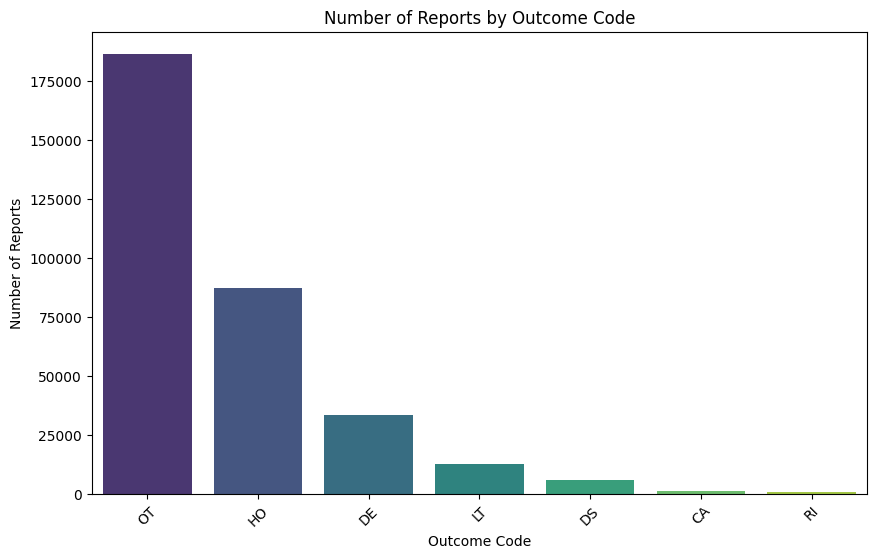

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrence of each outcome code
outc_counts = data['OUTC23Q4']['outc_cod'].value_counts().reset_index()
outc_counts.columns = ['Outcome Code', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome Code', y='Count', data=outc_counts, palette='viridis')
plt.title('Number of Reports by Outcome Code')
plt.xlabel('Outcome Code')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()


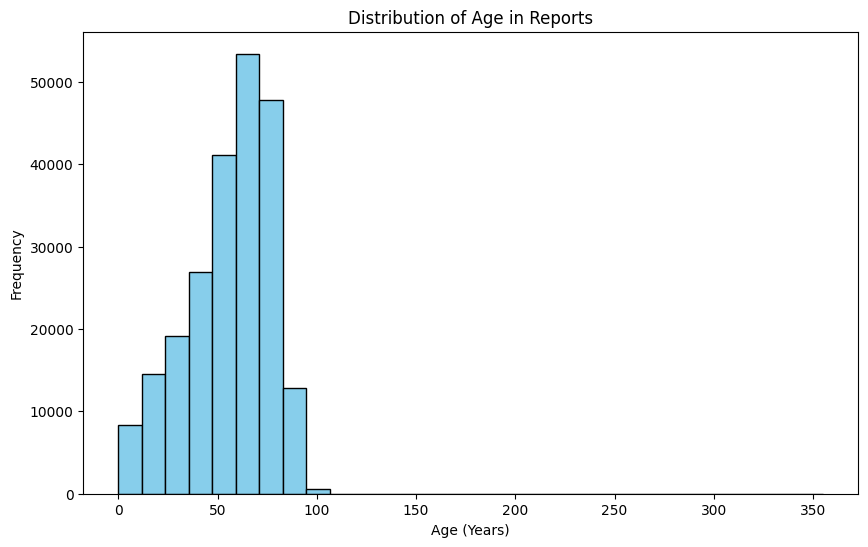

In [13]:
# Filter out rows where age is NaN or age code is not in years ('YR')
df_demo_filtered = data['DEMO23Q4'][data['DEMO23Q4']['age'].notna() & (data['DEMO23Q4']['age_cod'] == 'YR')]

plt.figure(figsize=(10, 6))
plt.hist(df_demo_filtered['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age in Reports')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-14-eb584dce2af1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Indication', data=indi_counts, palette='coolwarm')


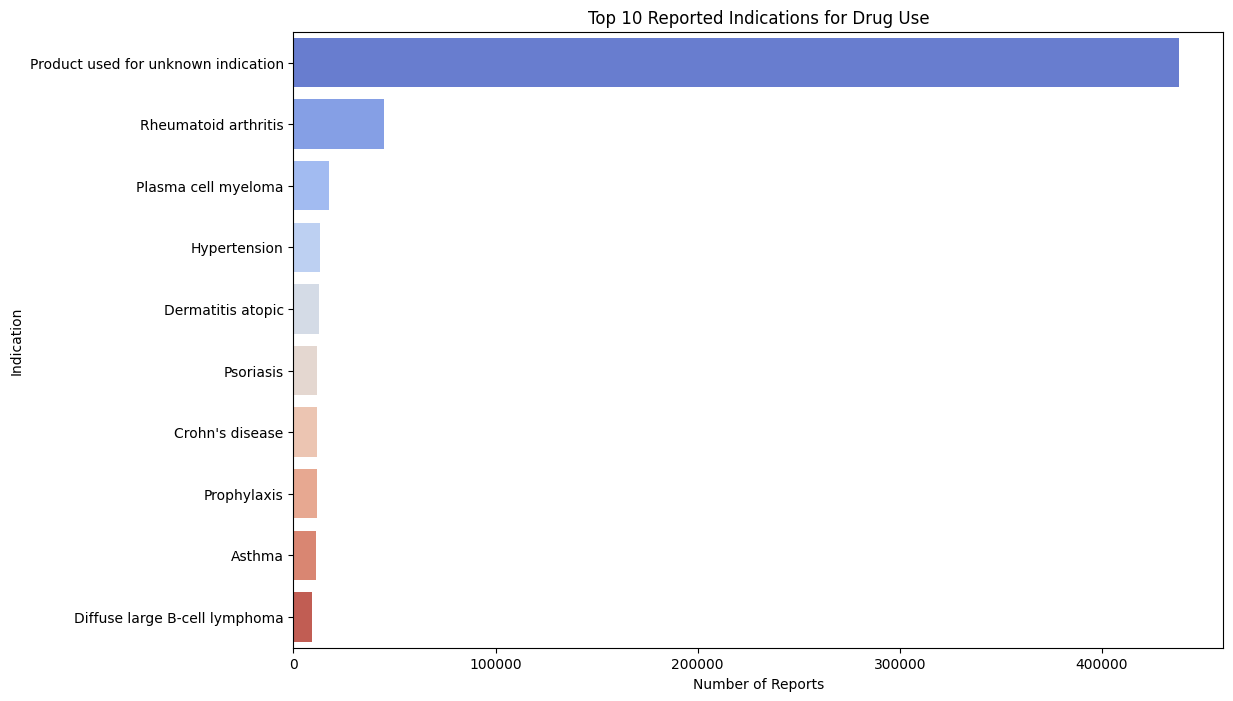

In [14]:
indi_counts = data['INDI23Q4']['indi_pt'].value_counts().nlargest(10).reset_index()
indi_counts.columns = ['Indication', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Indication', data=indi_counts, palette='coolwarm')
plt.title('Top 10 Reported Indications for Drug Use')
plt.xlabel('Number of Reports')
plt.ylabel('Indication')
plt.show()


In [15]:
# Import necessary libraries
import pandas as pd

# Dictionary to store summary information
summary = {}

# Iterate over each DataFrame
for df_name, df in data.items():
    # Calculate summary statistics
    summary_stats = df.describe(include='all')

    # Add summary statistics to the dictionary
    summary[df_name] = summary_stats

# Display summary information
for df_name, summary_stats in summary.items():
    print(f"Summary for DataFrame: {df_name}")
    print(summary_stats)
    print("\n------------------------------------\n")


Summary for DataFrame: THER23Q3
           primaryid        caseid   dsg_drug_seq      start_dt        end_dt  \
count   5.930270e+05  5.930270e+05  593027.000000  5.530550e+05  2.324460e+05   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean    4.176316e+08  2.164950e+07      10.374455  1.556357e+07  1.647621e+07   
std     5.503152e+08  2.099399e+06      28.866741  8.467648e+06  7.816027e+06   
min     4.081562e+07  4.081562e+06       1.000000  1.900000e+03  1.977000e+03   
25%     2.219951e+08  2.133086e+07       1.000000  2.011092e+07  2.018021e+07   
50%     2.274739e+08  2.267870e+07       3.000000  2.021091e+07  2.022051e+07   
75%     2.290893e+08  2.282476e+07      10.000000  2.023021e+07  2.023051e+07   
max     2.282719e+09  2.310338e+07    1262.000000  2.203072e+07  2.025073e+07

In [16]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415379 entries, 0 to 415378
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         415379 non-null  int64  
 1   caseid            415379 non-null  int64  
 2   caseversion       415379 non-null  int64  
 3   i_f_code          415379 non-null  object 
 4   event_dt          184550 non-null  float64
 5   mfr_dt            404730 non-null  float64
 6   init_fda_dt       415379 non-null  int64  
 7   fda_dt            415379 non-null  int64  
 8   rept_cod          415379 non-null  object 
 9   auth_num          34655 non-null   object 
 10  mfr_num           399647 non-null  object 
 11  mfr_sndr          415379 non-null  object 
 12  lit_ref           30970 non-null   object 
 13  age               231514 non-null  float64
 14  age_cod           231524 non-null  object 
 15  age_grp           110748 non-null  object 
 16  sex 

Summary Statistics:
          primaryid        caseid    caseversion      event_dt        mfr_dt  \
count  4.153790e+05  4.153790e+05  415379.000000  1.845500e+05  4.047300e+05   
mean   2.605085e+08  2.281569e+07       1.944494  2.022235e+07  2.023073e+07   
std    2.356498e+08  1.204200e+06       2.767720  3.337437e+04  3.016130e+03   
min    4.150516e+07  4.150515e+06       1.000000  1.012111e+07  2.000022e+07   
25%    2.303614e+08  2.302808e+07       1.000000  2.022112e+07  2.023101e+07   
50%    2.314368e+08  2.313562e+07       1.000000  2.023061e+07  2.023110e+07   
75%    2.325196e+08  2.324386e+07       2.000000  2.023100e+07  2.023113e+07   
max    1.945447e+10  2.336998e+07     104.000000  2.032010e+07  2.023123e+07   

        init_fda_dt        fda_dt            age            wt       rept_dt  
count  4.153790e+05  4.153790e+05  231514.000000  67880.000000  4.153790e+05  
mean   2.022936e+07  2.023112e+07     208.959372     75.798758  2.023111e+07  
std    7.331084e+03  8

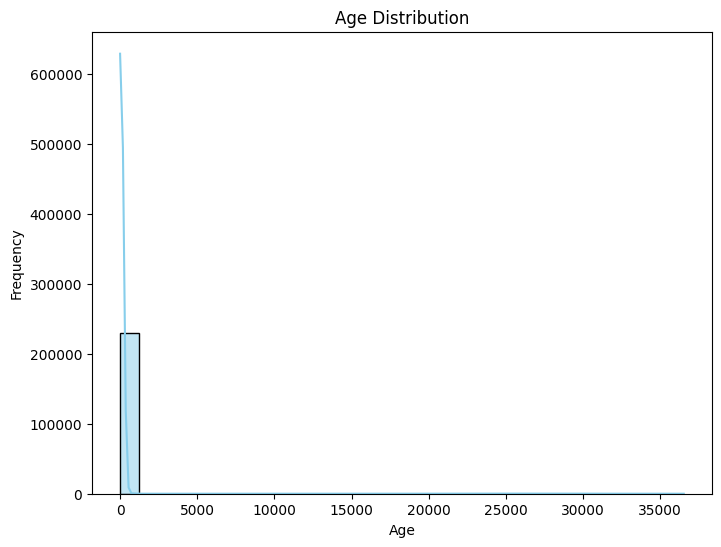

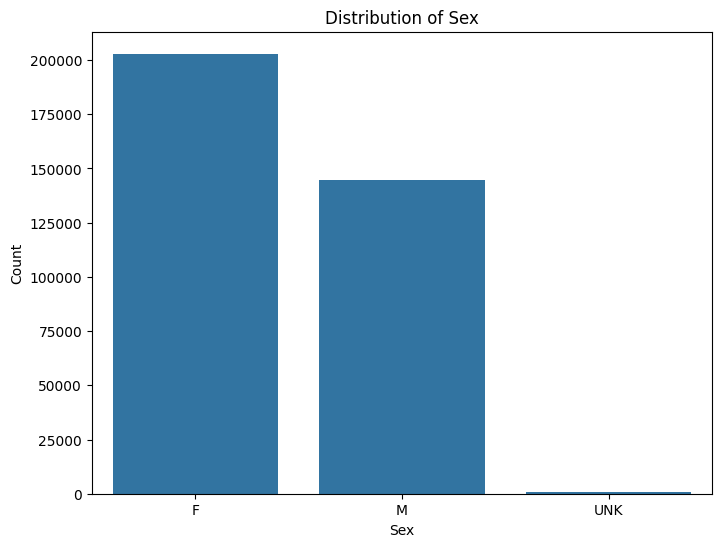

Missing Values Percentage:
primaryid            0.000000
caseid               0.000000
caseversion          0.000000
i_f_code             0.000000
event_dt            55.570696
mfr_dt               2.563683
init_fda_dt          0.000000
fda_dt               0.000000
rept_cod             0.000000
auth_num            91.657017
mfr_num              3.787385
mfr_sndr             0.000000
lit_ref             92.544158
age                 44.264395
age_cod             44.261987
age_grp             73.338084
sex                 16.124311
e_sub                0.000000
wt                  83.658298
wt_cod              83.658298
rept_dt              0.000000
to_mfr              96.298561
occp_cod             1.430982
reporter_country     0.000241
occr_country        12.633523
dtype: float64


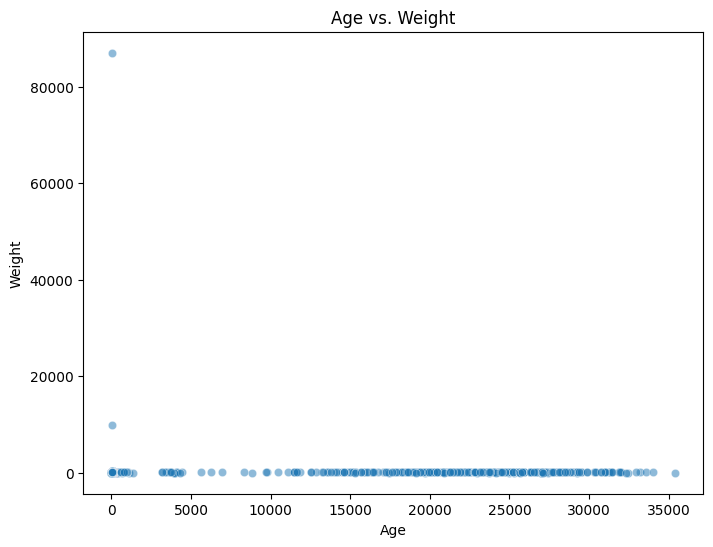

Text(0.5, 0, 'Sex')

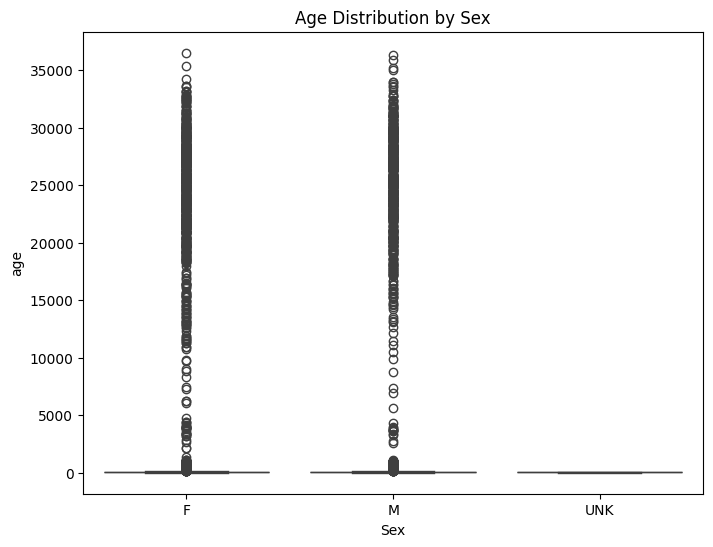

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
# Replace 'df' with the name of your DataFrame
# df = pd.read_csv("your_data.csv")

# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Univariate Analysis
# Histogram of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of sex distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Missing Values Analysis
missing_values = df.isnull().mean() * 100
print("Missing Values Percentage:")
print(missing_values)

# Bivariate Analysis
# Scatter plot of age vs. weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='wt', alpha=0.5)
plt.title('Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

# Box plot of age by sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='age')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')


In [18]:
print(df.columns)


Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr',
       'lit_ref', 'age', 'age_cod', 'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod',
       'rept_dt', 'to_mfr', 'occp_cod', 'reporter_country', 'occr_country'],
      dtype='object')


In [19]:
print(df.head())


    primaryid    caseid  caseversion i_f_code    event_dt      mfr_dt  \
0   100144838  10014483            8        F         NaN  20231123.0   
1  1001678124  10016781           24        F  20120330.0  20231130.0   
2  1002130539  10021305           39        F  20210415.0  20230523.0   
3   100293662  10029366            2        F         NaN  20231108.0   
4   100356167  10035616            7        F  20140321.0  20230928.0   

   init_fda_dt    fda_dt rept_cod auth_num  ... age_grp  sex e_sub    wt  \
0     20140317  20231205      EXP      NaN  ...     NaN  NaN     Y   NaN   
1     20140318  20231211      EXP      NaN  ...     NaN    F     Y   NaN   
2     20140319  20231130      EXP      NaN  ...       A    M     Y   NaN   
3     20140322  20231115      EXP      NaN  ...     NaN    M     Y   NaN   
4     20140325  20231002      EXP      NaN  ...       E    F     Y  50.0   

  wt_cod   rept_dt to_mfr occp_cod  reporter_country occr_country  
0    NaN  20231205    NaN       HP  

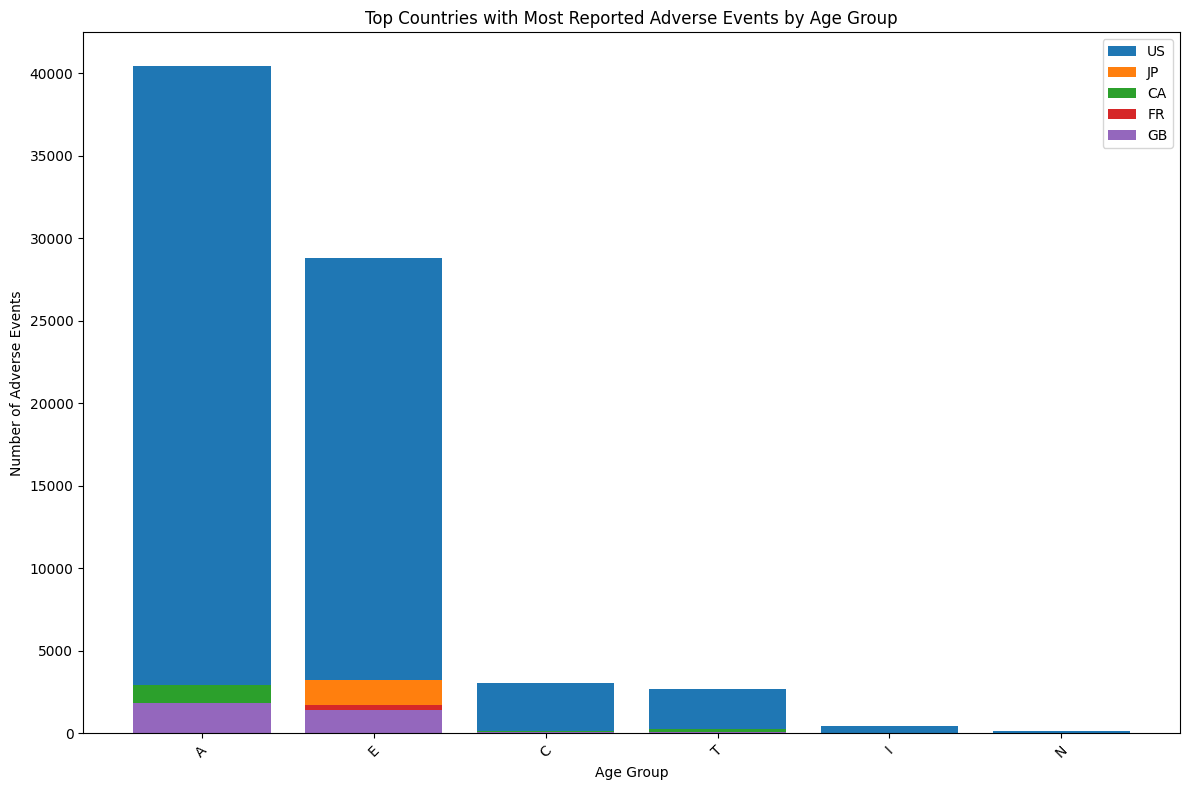

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the adverse event data

# Grouping the data by country and age group, and counting the number of events
grouped_data = df.groupby(['reporter_country', 'age_grp']).size().reset_index(name='count')

# Sorting the data by count in descending order
sorted_data = grouped_data.sort_values(by='count', ascending=False)

# Selecting the top N countries with the most reported events
top_countries = sorted_data['reporter_country'].unique()[:5]  # Change 5 to the desired number of countries

# Filtering the data to include only the top countries
filtered_data = sorted_data[sorted_data['reporter_country'].isin(top_countries)]

# Creating a bar plot
plt.figure(figsize=(12, 8))
for country in top_countries:
    country_data = filtered_data[filtered_data['reporter_country'] == country]
    plt.bar(country_data['age_grp'], country_data['count'], label=country)

plt.xlabel('Age Group')
plt.ylabel('Number of Adverse Events')
plt.title('Top Countries with Most Reported Adverse Events by Age Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


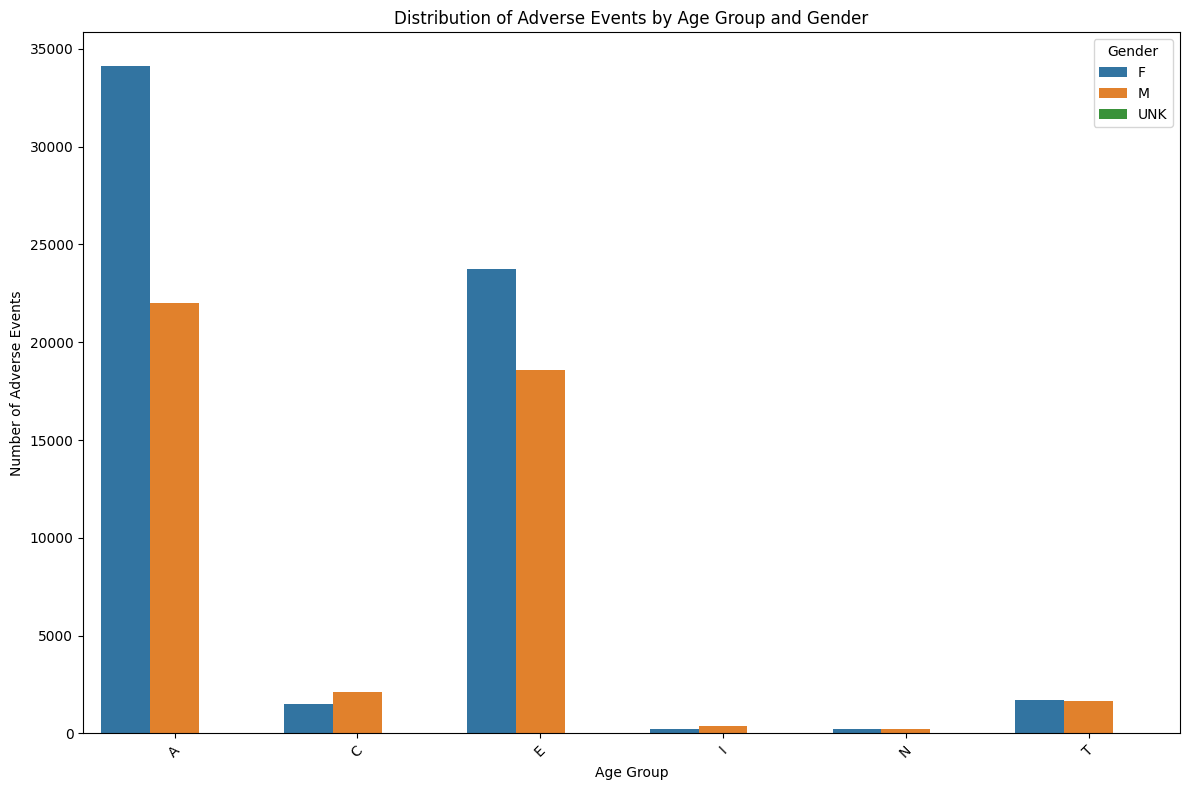

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the adverse event data

# Grouping the data by age group and gender, and counting the number of events
grouped_data = df.groupby(['age_grp', 'sex']).size().reset_index(name='count')

# Plotting the distribution of adverse events by age group and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='age_grp', y='count', hue='sex', data=grouped_data)
plt.xlabel('Age Group')
plt.ylabel('Number of Adverse Events')
plt.title('Distribution of Adverse Events by Age Group and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


In [22]:
print(data.keys())


dict_keys(['THER23Q3', 'DRUG23Q3', 'RPSR23Q3', 'REAC23Q3', 'INDI23Q3', 'OUTC23Q3', 'DEMO23Q3', 'THER23Q4', 'RPSR23Q4', 'DRUG23Q4', 'REAC23Q4', 'OUTC23Q4', 'INDI23Q4', 'DEMO23Q4'])


In [23]:
# Extracting relevant DataFrames
drug_df = data['DRUG23Q4']
outcome_df = data['OUTC23Q4']
adverse_reaction_df = data['REAC23Q4']
demographic_df = data['DEMO23Q4']


In [24]:
# Check the column names in each DataFrame to identify the relevant columns
for df_name, df in data.items():
    print(f"DataFrame Name: {df_name}")
    print(f"Columns: {df.columns.tolist()}")
    print("\n------------------------------------\n")


DataFrame Name: THER23Q3
Columns: ['primaryid', 'caseid', 'dsg_drug_seq', 'start_dt', 'end_dt', 'dur', 'dur_cod']

------------------------------------

DataFrame Name: DRUG23Q3
Columns: ['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq']

------------------------------------

DataFrame Name: RPSR23Q3
Columns: ['primaryid', 'caseid', 'rpsr_cod']

------------------------------------

DataFrame Name: REAC23Q3
Columns: ['primaryid', 'caseid', 'pt', 'drug_rec_act']

------------------------------------

DataFrame Name: INDI23Q3
Columns: ['primaryid', 'caseid', 'indi_drug_seq', 'indi_pt']

------------------------------------

DataFrame Name: OUTC23Q3
Columns: ['primaryid', 'caseid', 'outc_cod']

------------------------------------

DataFrame Name: DEMO23Q3
Columns: ['primaryid', 'caseid', 'caseversion', 

In [25]:
# Concatenate DRUG23Q3 and DRUG23Q4 DataFrames
drug_data_combined = pd.concat([data['DRUG23Q3'], data['DRUG23Q4']])

# Get the top 10 drugs based on frequency
top_drugs = drug_data_combined['drugname'].value_counts().nlargest(10).index.tolist()

# Print the top 10 drugs
print("Top 10 Drugs:")
print(top_drugs)


Top 10 Drugs:
['INFLECTRA', 'DUPIXENT', 'PREDNISONE', 'METHOTREXATE', 'VEDOLIZUMAB', 'ACETAMINOPHEN', 'ACETAMINOPHEN\\HYDROCODONE BITARTRATE', 'RITUXIMAB', 'TEDUGLUTIDE', 'COSENTYX']


In [26]:
# Create an empty dictionary to store drug-specific DataFrames
drug_groups = {}

# Group the data by each drug and store in the dictionary
for drug in top_drugs:
    # Extract rows related to the current drug
    drug_data = drug_data_combined[drug_data_combined['drugname'] == drug]
    # Store the drug-specific DataFrame in the dictionary
    drug_groups[drug] = drug_data

# Print the first few rows of each drug-specific DataFrame
for drug, drug_data in drug_groups.items():
    print(f"\nDrug: {drug}")
    print(drug_data.head())



Drug: INFLECTRA
        primaryid    caseid  drug_seq role_cod   drugname          prod_ai  \
17246  1402407341  14024073         1       PS  INFLECTRA  INFLIXIMAB-DYYB   
17247  1402407341  14024073         2       SS  INFLECTRA  INFLIXIMAB-DYYB   
17248  1402407341  14024073         3       SS  INFLECTRA  INFLIXIMAB-DYYB   
17249  1402407341  14024073         4       SS  INFLECTRA  INFLIXIMAB-DYYB   
17250  1402407341  14024073         5       SS  INFLECTRA  INFLIXIMAB-DYYB   

       val_vbm                                  route  \
17246        1  Intravenous (not otherwise specified)   
17247        1  Intravenous (not otherwise specified)   
17248        1  Intravenous (not otherwise specified)   
17249        1  Intravenous (not otherwise specified)   
17250        1  Intravenous (not otherwise specified)   

                                      dose_vbm  cum_dose_chr cum_dose_unit  \
17246  5 mg/kg, at 0, 2, 6, then every 8 weeks           NaN           NaN   
17247   5 mg/kg

In [27]:
# Check if reac23q3 DataFrame is defined
if 'reac23q3' in locals() or 'reac23q3' in globals():
    print("reac23q3 DataFrame is defined.")
else:
    print("reac23q3 DataFrame is not defined.")

# Check if INFLECTRA DataFrame is defined
if 'INFLECTRA' in locals() or 'INFLECTRA' in globals():
    print("INFLECTRA DataFrame is defined.")
else:
    print("INFLECTRA DataFrame is not defined.")


reac23q3 DataFrame is not defined.
INFLECTRA DataFrame is not defined.


In [28]:
print(drug_data.columns)


Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')


In [29]:
# List all variables currently defined in the Jupyter Notebook environment
%whos DataFrame


Variable              Type         Data/Info
--------------------------------------------
adverse_reaction_df   DataFrame              primaryid    ca<...>1500033 rows x 4 columns]
country_data          DataFrame        reporter_country age_<...>        GB       N     18
demographic_df        DataFrame             primaryid    cas<...>415379 rows x 25 columns]
df                    DataFrame             primaryid    cas<...>415379 rows x 25 columns]
df_demo_filtered      DataFrame             primaryid    cas<...>224646 rows x 25 columns]
drug_data             DataFrame              primaryid    ca<...>[23511 rows x 20 columns]
drug_data_combined    DataFrame              primaryid    ca<...>689123 rows x 20 columns]
drug_df               DataFrame             primaryid    cas<...>920732 rows x 20 columns]
filtered_data         DataFrame        reporter_country age_<...>        GB       N     18
grouped_data          DataFrame       age_grp  sex  count\n0<...>3\n12       T    M   1654


In [30]:
top_10_drugs = drug_data_combined['drugname'].value_counts().head(10).index.tolist()


In [31]:
print(drug_data_combined.columns)
print(adverse_reaction_df.columns)
print(outcome_df.columns)


Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')
Index(['primaryid', 'caseid', 'pt', 'drug_rec_act'], dtype='object')
Index(['primaryid', 'caseid', 'outc_cod'], dtype='object')


In [32]:
print("Drug Data Combined Columns:", drug_data_combined.columns.tolist())
print("Adverse Reaction DataFrame Columns:", adverse_reaction_df.columns.tolist())
print("Outcome DataFrame Columns:", outcome_df.columns.tolist())


Drug Data Combined Columns: ['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq']
Adverse Reaction DataFrame Columns: ['primaryid', 'caseid', 'pt', 'drug_rec_act']
Outcome DataFrame Columns: ['primaryid', 'caseid', 'outc_cod']


In [33]:
top_drugs = drug_data_combined['drugname'].value_counts().head(10).index.tolist()
print("Top 10 Drugs:", top_drugs)


Top 10 Drugs: ['INFLECTRA', 'DUPIXENT', 'PREDNISONE', 'METHOTREXATE', 'VEDOLIZUMAB', 'ACETAMINOPHEN', 'ACETAMINOPHEN\\HYDROCODONE BITARTRATE', 'RITUXIMAB', 'TEDUGLUTIDE', 'COSENTYX']


In [34]:
# Select the first drug from your top 10 list
selected_drug = top_drugs[0]

# Filter adverse reaction data for the selected drug
filtered_adverse_reactions = adverse_reaction_df[adverse_reaction_df['primaryid'].isin(drug_data_combined[drug_data_combined['drugname'] == selected_drug]['primaryid'])]

# Filter outcomes data for the selected drug
filtered_outcomes = outcome_df[outcome_df['primaryid'].isin(drug_data_combined[drug_data_combined['drugname'] == selected_drug]['primaryid'])]

# Print basic info about the filtered data
print(f"Adverse reactions for {selected_drug}: {filtered_adverse_reactions.shape[0]} records found.")
print(f"Outcomes for {selected_drug}: {filtered_outcomes.shape[0]} records found.")


Adverse reactions for INFLECTRA: 45977 records found.
Outcomes for INFLECTRA: 4397 records found.


In [35]:
common_reactions = filtered_adverse_reactions['pt'].value_counts().head(5)
print("Most common adverse reactions for INFLECTRA:", common_reactions)


Most common adverse reactions for INFLECTRA: Off label use                                       5204
Condition aggravated                                2578
Intentional product use issue                       1878
Inappropriate schedule of product administration    1397
Arthralgia                                          1314
Name: pt, dtype: int64


In [36]:
outcome_distribution = filtered_outcomes['outc_cod'].value_counts()
print("Outcome distribution for INFLECTRA:", outcome_distribution)


Outcome distribution for INFLECTRA: OT    3384
HO     910
DE      43
DS      31
LT      25
CA       2
RI       2
Name: outc_cod, dtype: int64


In [37]:
for drug in top_drugs:
    # Filter data for the current drug
    filtered_adverse = adverse_reaction_df[adverse_reaction_df['primaryid'].isin(drug_data_combined[drug_data_combined['drugname'] == drug]['primaryid'])]
    filtered_outcomes = outcome_df[outcome_df['primaryid'].isin(drug_data_combined[drug_data_combined['drugname'] == drug]['primaryid'])]

    # Analyze adverse reactions
    common_reactions = filtered_adverse['pt'].value_counts().head(5)
    print(f"Most common adverse reactions for {drug}:", common_reactions)

    # Analyze outcomes
    outcome_distribution = filtered_outcomes['outc_cod'].value_counts()
    print(f"Outcome distribution for {drug}:", outcome_distribution, "\n")


Most common adverse reactions for INFLECTRA: Off label use                                       5204
Condition aggravated                                2578
Intentional product use issue                       1878
Inappropriate schedule of product administration    1397
Arthralgia                                          1314
Name: pt, dtype: int64
Outcome distribution for INFLECTRA: OT    3384
HO     910
DE      43
DS      31
LT      25
CA       2
RI       2
Name: outc_cod, dtype: int64 

Most common adverse reactions for DUPIXENT: Pruritus                                3109
Product use in unapproved indication    1828
Rash                                    1814
Injection site pain                     1757
Dry skin                                1694
Name: pt, dtype: int64
Outcome distribution for DUPIXENT: OT    1688
HO    1032
DS     147
DE      51
LT      18
RI       7
CA       4
Name: outc_cod, dtype: int64 

Most common adverse reactions for PREDNISONE: Off label use         

In [38]:
# List of all data frames in the environment
data_frames = [drug_data_combined, adverse_reaction_df, outcome_df]

# Iterate through each data frame
for df in data_frames:
    print(f"DataFrame Columns: {df.columns}")
    dur_columns = [col for col in df.columns if 'DUR' in col]
    if dur_columns:
        print(f"Found therapy duration columns in DataFrame: {dur_columns}")
    else:
        print("Therapy duration columns not found in this DataFrame")
    print()


DataFrame Columns: Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')
Therapy duration columns not found in this DataFrame

DataFrame Columns: Index(['primaryid', 'caseid', 'pt', 'drug_rec_act'], dtype='object')
Therapy duration columns not found in this DataFrame

DataFrame Columns: Index(['primaryid', 'caseid', 'outc_cod'], dtype='object')
Therapy duration columns not found in this DataFrame



In [39]:
# List of all data frames in the environment
data_frames = [drug_data_combined, adverse_reaction_df, outcome_df]

# Iterate through each data frame
for df_name, df in zip(["drug_data_combined", "adverse_reaction_df", "outcome_df"], data_frames):
    print(f"DataFrame: {df_name}")
    dur_columns = [col for col in df.columns if 'DUR' in col]
    if dur_columns:
        print(f"Therapy duration columns found: {dur_columns}")
    else:
        print("Therapy duration columns not found in this DataFrame")
    print()


DataFrame: drug_data_combined
Therapy duration columns not found in this DataFrame

DataFrame: adverse_reaction_df
Therapy duration columns not found in this DataFrame

DataFrame: outcome_df
Therapy duration columns not found in this DataFrame



In [48]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\kms97\OneDrive\Desktop\Project-IS833\FAERS-analytics\data-out\FAERS_ASCII_2023_Q4\ASCII\THER23Q4.txt'

try:
    # Read the file
    with open(file_path, 'r') as file:
        # Read the lines from the file
        lines = file.readlines()

        # List to store therapy duration data
        therapy_duration_data = []

        # Extract therapy duration columns
        for line in lines:
            if 'DUR' in line and 'DUR_COD' in line:
                print("Therapy duration columns found:")
                print(line.strip())
                therapy_duration_data.append(line.strip().split('$'))
            else:
                print("Therapy duration columns not found in this line:")
                print(line.strip())

    # Create a DataFrame from the extracted data
    therapy_duration_df = pd.DataFrame(therapy_duration_data, columns=['primaryid', 'caseid', 'DUR', 'DUR_COD'])

    # Display the first few rows of the DataFrame
    print(therapy_duration_df.head())

except FileNotFoundError:
    print(f"File not found: {file_path}")


File not found: C:\Users\kms97\OneDrive\Desktop\Project-IS833\FAERS-analytics\data-out\FAERS_ASCII_2023_Q4\ASCII\THER23Q4.txt
